In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
import json
import geopandas as gp
import matplotlib.pyplot as plt


In [2]:
NIS_name = pd.read_csv('../../data/interim/census_2011/NIS_name.csv')

In [3]:
samples_path = '../../data/interim/model_parameters/arrondissements/'

In [4]:
sample_dicts = {}

In [5]:
for filename in glob.glob(os.path.join(samples_path+'*.json')):
    arr = filename.split('/')[-1].split('_2020')[0]
    with open(filename, 'r') as fp:
        sample_dicts[arr] = json.load(fp)

In [6]:
R0_dict = {arr:np.mean(sample_dicts[arr]['R0']).round(2) for arr in sample_dicts.keys()}

In [7]:
beta_dict = {arr:np.mean(sample_dicts[arr]['beta']).round(2) for arr in sample_dicts.keys()}

Basis reproductiegetal zegt iets over hoe snel initiële verspreiding was in een arrondissement (of maw hoeveel within-contacts er zijn). Maar om evolutie op te volgen => niet beter effectief reproductiegetal te berekenen?

In [47]:
## Create arrondissements shapefile
# gemeentes = gp.read_file("../../data/raw/geopandas/BE/AD_2_Municipality.shp")
# gemeentes['short_nis'] = gemeentes.NISCode.apply(lambda x: str(x)[:2])
# # select the columns that you with to use for the dissolve and that will be retained
# gemeentes_new = gemeentes[['short_nis','geometry']]
# # dissolve the state boundary by region 
# arrondissementen = gemeentes_new.dissolve(by='short_nis').reset_index()
# arrondissementen['NIS'] = arrondissementen.short_nis.apply(lambda x: x+'000')
# arrondissementen = arrondissementen[['NIS','geometry']]
# arrondissementen.to_file('../../data/raw/geopandas/BE/Arrondissements.shp')

In [49]:
# Read arrondissements shapefile
arrondissementen = gp.read_file("../../data/raw/geopandas/BE/Arrondissements.shp")

In [54]:
R0_df = pd.DataFrame.from_dict(R0_dict, orient='index').reset_index().rename(columns={'index':'NIS',0:'R0'})

In [57]:
R0_df_geom = gp.GeoDataFrame(pd.merge(R0_df, arrondissementen, on='NIS'))

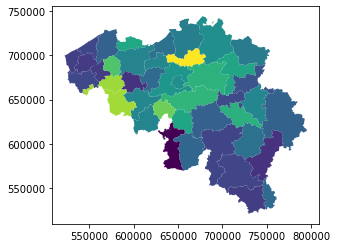

In [58]:
fig,ax = plt.subplots()
R0_df_geom.plot(column='R0', cmap='viridis', ax=ax)

In [30]:
type(R0_df_geom)

pandas.core.frame.DataFrame